In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

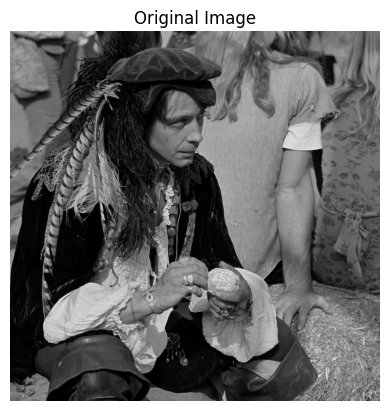

In [2]:
try:
    image = cv2.imread('man.bmp', cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError
except:
    print("Input image not found. Generating a synthetic gradient image.")
    image = np.linspace(0, 255, 256).astype(np.uint8)
    image = np.tile(image, (256, 1))
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

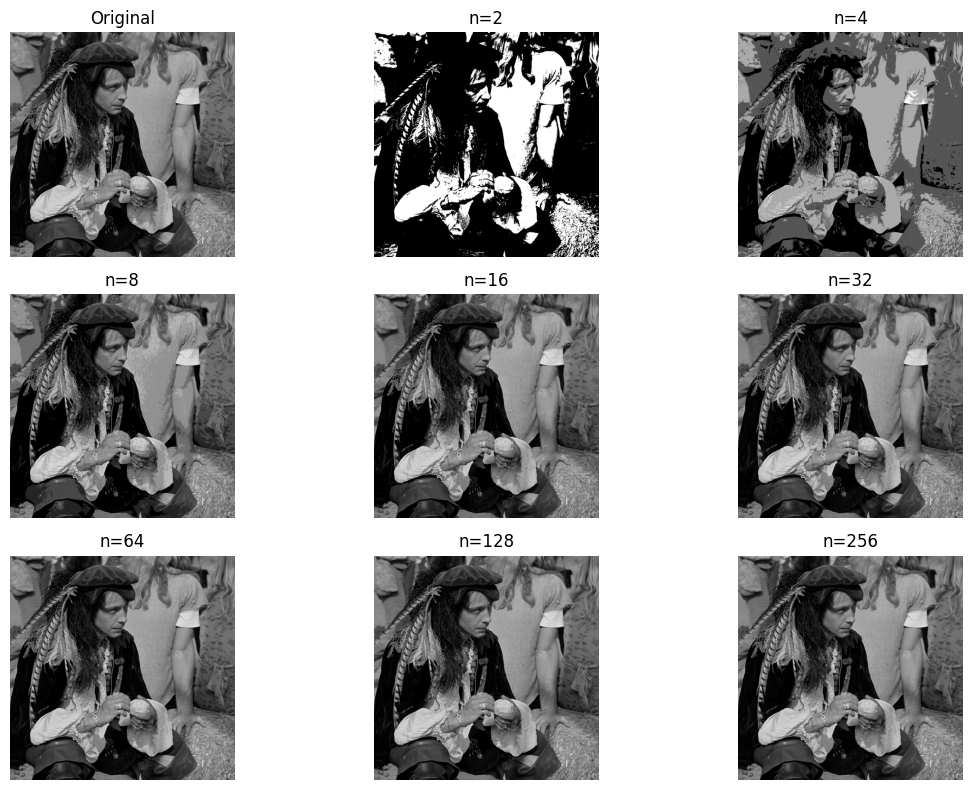

In [3]:
def reduce_intensity_levels(image, n):
    """Reduce image intensity levels to n levels (power of 2)."""
    img_float = image.astype(np.float32) / 255.0
    idx = np.round(img_float * (n - 1)).astype(np.int32)
    reduced = (idx * 255.0 / (n - 1)).astype(np.uint8)
    return reduced

n_values = [2, 4, 8, 16, 32, 64, 128, 256]
plt.figure(figsize=(12, 8))
plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')

for i, n in enumerate(n_values, 2):
    reduced = reduce_intensity_levels(image, n)
    plt.subplot(3, 3, i)
    plt.imshow(reduced, cmap='gray')
    plt.title(f'n={n}')
    plt.axis('off')
    cv2.imwrite(f'reduced_{n}.png', reduced)

plt.tight_layout()
plt.show()

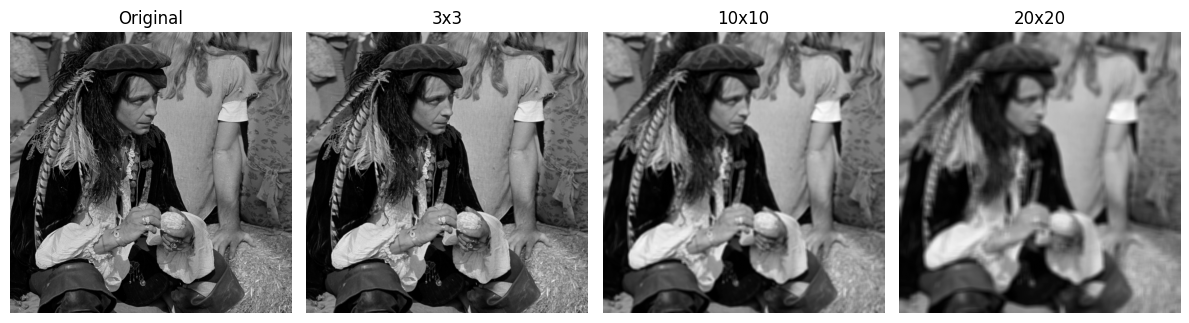

In [4]:
kernel_sizes = [3, 10, 20]
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')

for i, k in enumerate(kernel_sizes, 2):
    blurred = cv2.blur(image, (k, k))
    plt.subplot(1, 4, i)
    plt.imshow(blurred, cmap='gray')
    plt.title(f'{k}x{k}')
    plt.axis('off')
    cv2.imwrite(f'blurred_{k}x{k}.png', blurred)

plt.tight_layout()
plt.show()


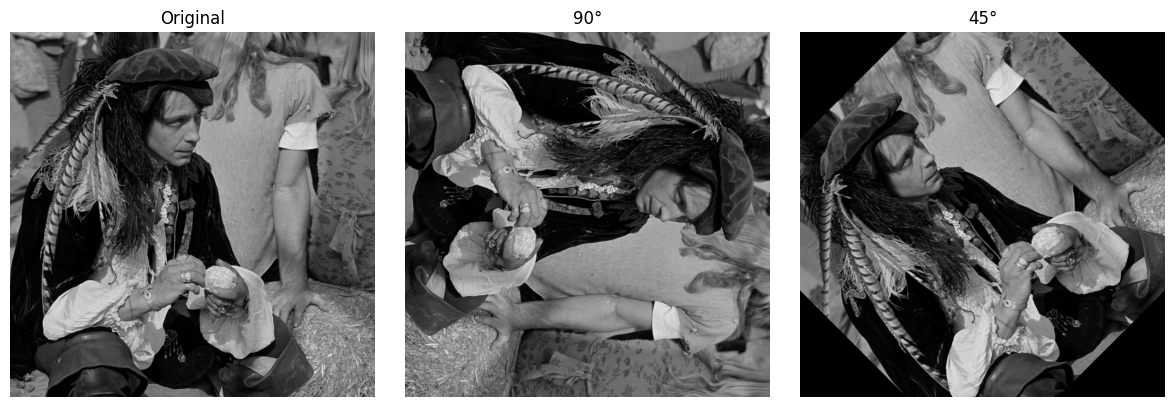

In [5]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')

# 90-degree rotation
rotated_90 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
plt.subplot(1, 3, 2)
plt.imshow(rotated_90, cmap='gray')
plt.title('90°')
plt.axis('off')
cv2.imwrite('rotated_90.png', rotated_90)

# 45-degree rotation
h, w = image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_45 = cv2.warpAffine(image, M, (w, h))
plt.subplot(1, 3, 3)
plt.imshow(rotated_45, cmap='gray')
plt.title('45°')
plt.axis('off')
cv2.imwrite('rotated_45.png', rotated_45)

plt.tight_layout()
plt.show()

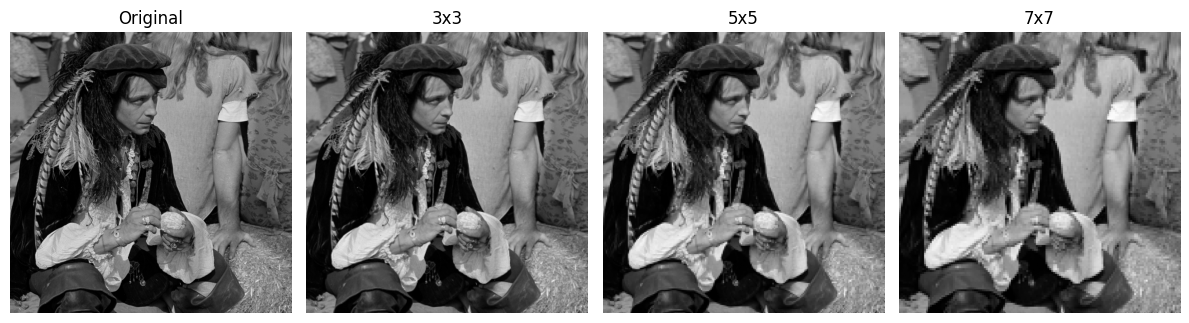

In [6]:
def block_average(image, block_size):
    """Replace non-overlapping blocks with their average."""
    result = image.copy()
    h, w = image.shape
    for i in range(0, h - block_size + 1, block_size):
        for j in range(0, w - block_size + 1, block_size):
            block = image[i:i+block_size, j:j+block_size]
            avg = np.round(np.mean(block)).astype(np.uint8)
            result[i:i+block_size, j:j+block_size] = avg
    return result

block_sizes = [3, 5, 7]
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')

for i, b in enumerate(block_sizes, 2):
    averaged = block_average(image, b)
    plt.subplot(1, 4, i)
    plt.imshow(averaged, cmap='gray')
    plt.title(f'{b}x{b}')
    plt.axis('off')
    cv2.imwrite(f'block_averaged_{b}x{b}.png', averaged)

plt.tight_layout()
plt.show()